In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
constraint_by_gene_raw = pd.read_csv('../data/gnomad_standard/constraint_final.csv.gz', compression='gzip', index_col=0)
constraint_by_gene_raw

,gene,transcript,canonical,variant_class,obs,exp,oe,adj_mu,raw_mu,poss,logP_H0,oe_lower,oe_upper
0,AAMP,ENST00000248450,True,non-coding variants,329,350.162870,0.939563,1258.559807,0.000022,13089,-2.022766,0.858,1.029
1,AAMP,ENST00000420660,False,non-coding variants,329,350.162870,0.939563,1258.559807,0.000022,13089,-2.022766,0.858,1.029
2,AAMP,ENST00000422731,False,non-coding variants,329,350.162870,0.939563,1258.559807,0.000022,13089,-2.022766,0.858,1.029
3,AAMP,ENST00000444053,False,non-coding variants,329,350.162870,0.939563,1258.559807,0.000022,13089,-2.022766,0.858,1.029
4,AAMP,ENST00000447885,False,non-coding variants,329,350.162870,0.939563,818.175721,0.000022,8316,-2.022766,0.858,1.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,hsa-mir-548ba,ENST00000579477,True,non-coding variants,241,299.261368,0.805316,1050.083198,0.000019,10311,-8.196311,0.724,0.896
9435,snoU13,ENST00000458849,True,non-coding variants,0,0.000000,NaN,2691.233246,0.000000,30294,-0.405965,0.000,2.850
9436,snoU13,ENST00000458934,True,non-coding variants,174,178.735375,0.973506,2376.100963,0.000010,26493,-0.974334,0.860,1.104
9437,snoU13,ENST00000458967,True,non-coding variants,87,97.536258,0.891976,2635.117790,0.000005,30303,-1.874920,0.749,1.066


In [3]:
gpcr_genes = pd.read_csv('../data/Ensembl_Grch37_gpcr_genome_locations.csv')
gpcr_genes = gpcr_genes[['HGNC symbol','HGNC name','Grch37 symbol']]
gpcr_genes.columns = ['symbol','gene_name_long','gene']
gpcr_genes

,symbol,gene_name_long,gene
0,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC
1,ACKR2,atypical chemokine receptor 2,ACKR2
2,ACKR3,atypical chemokine receptor 3,ACKR3
3,ACKR4,atypical chemokine receptor 4,ACKR4
4,ADCYAP1R1,ADCYAP receptor type I,ADCYAP1R1
...,...,...,...
388,TSHR,thyroid stimulating hormone receptor,TSHR
389,UTS2R,urotensin 2 receptor,UTS2R
390,VIPR1,vasoactive intestinal peptide receptor 1,VIPR1
391,VIPR2,vasoactive intestinal peptide receptor 2,VIPR2


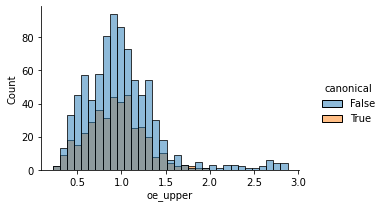

In [13]:
gpcr_constraint = gpcr_genes.merge(constraint_by_gene_raw, on='gene',how='left')
#sns.displot(data=gpcr_constraint, row='variant_class',kind='hist', hue='canonical',x='oe_upper')
sns.displot(data=gpcr_constraint[gpcr_constraint.variant_class =='mis_pphen'],kind='hist', hue='canonical',x='oe_upper',aspect=1.5,height=3)
plt.savefig('../plots/mis_pphen_constraint_by_canonical_status.png', dpi=600)

In [5]:
gpcr_constraint = gpcr_genes.merge(constraint_by_gene_raw, on='gene',how='left')
gpcr_constraint = gpcr_constraint[gpcr_constraint.canonical].drop(columns = ['canonical'])
#gpcr_constraint = gpcr_constraint[gpcr_constraint.variant_class.isin(('lof_hc','mis_pphen'))]
gpcr_constraint

,symbol,gene_name_long,gene,transcript,variant_class,obs,exp,oe,adj_mu,raw_mu,poss,logP_H0,oe_lower,oe_upper
0,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,lof_hc,6,7.186750,0.834870,7.186750,3.106057e-07,80,-0.863451,0.456,1.647
1,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,lof_lc,1,1.428010,0.700275,1.428010,6.109832e-08,18,-0.599494,0.237,2.568
2,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,mis_non_pphen,131,118.562849,1.104899,118.562849,6.041680e-06,1352,-0.127384,0.958,1.277
3,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,mis_pphen,62,61.237306,1.012455,61.237306,2.702245e-06,781,-0.560900,0.824,1.251
4,ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,non-coding variants,70,64.170366,1.090846,576.066502,3.447610e-06,6546,-0.240246,0.899,1.331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7682,XCR1,X-C motif chemokine receptor 1,XCR1,ENST00000309285,lof_lc,0,1.635996,0.000000,2.268384,7.088606e-08,24,-1.668950,0.000,1.750
7683,XCR1,X-C motif chemokine receptor 1,XCR1,ENST00000309285,mis_non_pphen,98,134.569569,0.728248,134.858353,8.554603e-06,1350,-7.482117,0.617,0.861
7684,XCR1,X-C motif chemokine receptor 1,XCR1,ENST00000309285,mis_pphen,60,75.234068,0.797511,75.320646,5.010076e-06,809,-3.203374,0.647,0.989
7685,XCR1,X-C motif chemokine receptor 1,XCR1,ENST00000309285,non-coding variants,29,29.986863,0.967090,2479.120878,1.739138e-06,29154,-0.743216,0.719,1.319


In [61]:
gpcr_constraint.groupby('variant_class').median()

,obs,exp,oe,adj_mu,raw_mu,poss,logP_H0,oe_lower,oe_upper
variant_class,,,,,,,,,
lof_hc,6.0,10.709158,0.534407,10.935332,5.875434e-07,122.0,-2.589820,0.294,1.0750
lof_lc,1.0,0.975282,0.447040,1.703966,4.206826e-08,19.0,-0.610591,0.160,2.6145
mis_non_pphen,143.5,156.593010,0.920753,162.485710,9.256595e-06,1636.0,-1.895161,0.808,1.0475
mis_pphen,62.0,87.074880,0.765390,91.375659,5.244866e-06,974.5,-4.635059,0.625,0.9245
non-coding variants,56.0,59.582315,0.942113,3098.978621,3.079432e-06,34267.5,-1.094059,0.780,1.1385
syn,102.5,108.070360,0.967365,110.886559,6.658850e-06,860.0,-0.952640,0.828,1.1315


In [38]:
print(f'{(gpcr_constraint[gpcr_constraint.variant_class=="syn"].oe_upper > 1).sum()} genes with OEUF > 1 for syn variants')
print(f'{(gpcr_constraint[gpcr_constraint.variant_class=="non-coding variants"].oe_upper < 1).sum()} genes with OEUF > 1 for NC variants')
print(f'{(gpcr_constraint[gpcr_constraint.variant_class=="mis_non_pphen"].oe_upper < 1).sum()} genes with OEUF > 1 for benign missense variants')
print(f'{(gpcr_constraint[gpcr_constraint.variant_class=="mis_pphen"].oe_upper < 1).sum()} genes with OEUF > 1 for damaging missense variants')
print(f'{(gpcr_constraint[gpcr_constraint.variant_class=="lof_hc"].oe_upper < 1).sum()} genes with OEUF > 1 for lof variants')

328 genes with OEUF > 1 for syn variants
89 genes with OEUF > 1 for NC variants
155 genes with OEUF > 1 for benign missense variants
232 genes with OEUF > 1 for damaging missense variants
166 genes with OEUF > 1 for lof variants


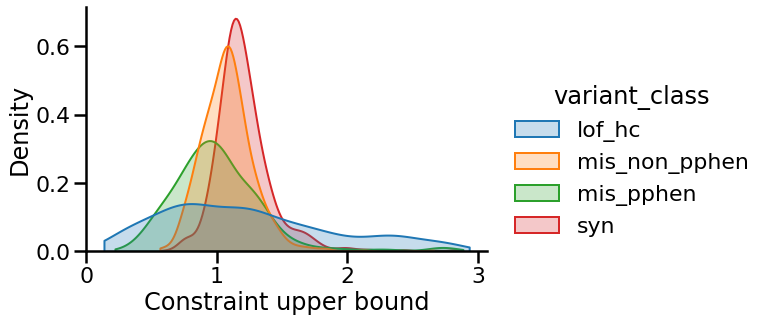

In [17]:
sns.set_context('poster')
gpcr_constraint['neg_logP_H0'] = -gpcr_constraint['logP_H0']
sns.displot(data=gpcr_constraint[~np.isinf(gpcr_constraint.logP_H0) & gpcr_constraint.variant_class.isin(('lof_hc','mis_pphen','mis_non_pphen','syn'))],x='oe_upper',hue='variant_class',height=5,aspect=1.5,kind='kde', fill=True,cut=0)
#plt.tight_layout()
plt.xlabel('Constraint upper bound')
plt.savefig('../plots/oeuf_density_by_variant_class.png')
#plt.ylim(0,0.03)

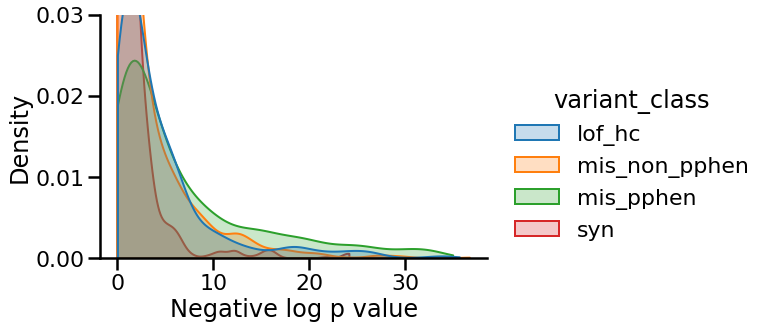

In [19]:

sns.set_context('poster')
gpcr_constraint['neg_logP_H0'] = -gpcr_constraint['logP_H0']
sns.displot(data=gpcr_constraint[~np.isinf(gpcr_constraint.logP_H0) & gpcr_constraint.variant_class.isin(('lof_hc','mis_pphen','mis_non_pphen','syn'))],x='neg_logP_H0',hue='variant_class',height=5,aspect=1.5,kind='kde', fill=True,cut=0)
#plt.tight_layout()
plt.xlabel('Negative log p value')
plt.ylim(0,0.03)
plt.savefig('../plots/logP_density_by_variant_class.png')


In [139]:
(gpcr_constraint[gpcr_constraint.variant_class == 'lof_hc'].neg_logP_H0  > 15).sum()

32

In [140]:
(gpcr_constraint[gpcr_constraint.variant_class == 'mis_pphen'].neg_logP_H0  > 15).sum()

92

In [42]:
gpcr_constraint_wide = pd.pivot(gpcr_constraint,
    index=['symbol','gene_name_long','gene','transcript'], 
    columns = 'variant_class', 
    values=['obs','oe','oe_upper','logP_H0'])
gpcr_constraint_wide.columns = ['_'.join(col).strip() for col in gpcr_constraint_wide.columns.values]
gpcr_constraint_wide.to_csv('../results/gpcr_constraint_wide.csv')
gpcr_constraint_wide


,,,,obs_lof_hc,obs_lof_lc,obs_mis_non_pphen,obs_mis_pphen,obs_non-coding variants,obs_syn,oe_lof_hc,oe_lof_lc,oe_mis_non_pphen,oe_mis_pphen,...,oe_upper_mis_non_pphen,oe_upper_mis_pphen,oe_upper_non-coding variants,oe_upper_syn,logP_H0_lof_hc,logP_H0_lof_lc,logP_H0_mis_non_pphen,logP_H0_mis_pphen,logP_H0_non-coding variants,logP_H0_syn
symbol,gene_name_long,gene,transcript,,,,,,,,,,,,,,,,,,,,,
ACKR1,atypical chemokine receptor 1 (Duffy blood group),DARC,ENST00000368121,6.0,1.0,131.0,62.0,70.0,87.0,0.834870,0.700275,1.104899,1.012455,...,1.277,1.251,1.331,1.239,-0.863451,-0.599494,-0.127384,-0.560900,-0.240246,-0.423040
ACKR2,atypical chemokine receptor 2,ACKR2,ENST00000422265,5.0,4.0,138.0,67.0,63.0,92.0,0.699601,1.382148,0.856630,0.998824,...,0.987,1.224,0.965,1.132,-1.266259,-0.197805,-3.364347,-0.640636,-3.676271,-1.078209
ACKR3,atypical chemokine receptor 3,ACKR3,ENST00000272928,2.0,1.0,144.0,36.0,29.0,107.0,0.213341,0.870491,0.895257,0.508340,...,1.028,0.671,1.298,1.140,-5.383632,-0.464695,-2.343352,-12.508423,-0.817718,-0.915896
ACKR4,atypical chemokine receptor 4,ACKR4,ENST00000249887,12.0,0.0,102.0,45.0,130.0,61.0,1.174999,0.000000,0.819509,0.752772,...,0.966,0.965,1.173,1.164,-0.260789,-0.898557,-3.834230,-3.573026,-0.537390,-1.071240
ADCYAP1R1,ADCYAP receptor type I,ADCYAP1R1,ENST00000396211,20.0,0.0,134.0,85.0,425.0,112.0,0.592478,0.000000,0.767886,0.761280,...,0.886,0.912,0.953,1.163,-4.897661,-0.479590,-7.110609,-5.285055,-5.583109,-0.701258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSHR,thyroid stimulating hormone receptor,TSHR,ENST00000541158,24.0,0.0,243.0,146.0,310.0,176.0,0.877378,0.000000,0.968572,0.798038,...,1.077,0.916,1.083,1.129,-1.205391,-1.021579,-1.137378,-5.927453,-0.882456,-0.699018
UTS2R,urotensin 2 receptor,UTS2R,ENST00000313135,6.0,4.0,145.0,60.0,11.0,116.0,1.323467,1.210307,0.800275,0.762376,...,0.919,0.945,0.750,0.992,-0.194524,-0.282669,-5.785516,-4.084707,-6.141664,-3.191420
VIPR1,vasoactive intestinal peptide receptor 1,VIPR1,ENST00000325123,35.0,0.0,170.0,89.0,294.0,97.0,1.316452,0.000000,0.974624,0.906562,...,1.107,1.081,0.993,0.989,-0.048454,-0.618062,-0.954452,-1.658757,-3.261817,-3.257350


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   6.,   5.,   4.,   3.,
          3.,   3.,   4.,   6.,   6.,  12.,  14.,  12.,  11.,  12.,  16.,
         17.,  31.,  34.,  59., 110.]),
 array([-100.        ,  -98.33333333,  -96.66666667,  -95.        ,
         -93.33333333,  -91.66666667,  -90.        ,  -88.33333333,
         -86.66666667,  -85.        ,  -83.33333333,  -81.66666667,
         -80.        ,  -78.33333333,  -76.66666667,  -75.        ,
         -73.33333333,  -71.66666667,  -70.        ,  -68.33333333,
         -66.66666667,  -65.        ,  -63.33333333,  -61.66666667,
         -60.        ,  -58.33333333,  -56.66666667,  -55.        ,
         -53.33333333,  -51.66666667,  -50.        ,  -48.33333333,
         -46.66666667,  -45.        ,  -43.333

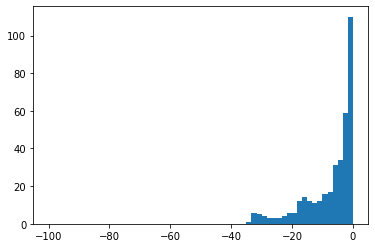

In [43]:
sns.pointplot(gpcr_constraint_wide,x='Cl'

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   2.,   2.,   0.,   2.,   4.,   4.,   6.,   8.,
          6.,  14.,  31.,  48.,  61., 163.]),
 array([-100.,  -98.,  -96.,  -94.,  -92.,  -90.,  -88.,  -86.,  -84.,
         -82.,  -80.,  -78.,  -76.,  -74.,  -72.,  -70.,  -68.,  -66.,
         -64.,  -62.,  -60.,  -58.,  -56.,  -54.,  -52.,  -50.,  -48.,
         -46.,  -44.,  -42.,  -40.,  -38.,  -36.,  -34.,  -32.,  -30.,
         -28.,  -26.,  -24.,  -22.,  -20.,  -18.,  -16.,  -14.,  -12.,
         -10.,   -8.,   -6.,   -4.,   -2.,    0.]),
 <BarContainer object of 50 artists>)

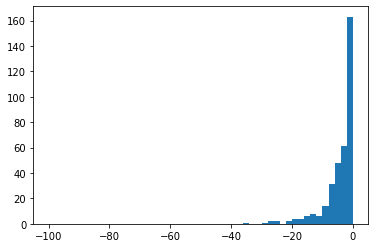

In [15]:
plt.hist(gpcr_constraint.logP_H0_lof_hc.values,range=(-100,0),bins=50)

In [34]:
gpcr_constraint_wide = pd.read_csv('../results/gpcr_constraint_wide.csv')
upper_bounds = gpcr_constraint_wide[gpcr_constraint_wide.columns[gpcr_constraint_wide.columns.str.startswith('oe_upper')]]
upper_bounds

,oe_upper_lof_hc,oe_upper_lof_lc,oe_upper_mis_non_pphen,oe_upper_mis_pphen,oe_upper_non-coding variants,oe_upper_syn
0,1.647,2.568,1.277,1.251,1.331,1.239
1,1.471,2.686,0.987,1.224,0.965,1.132
2,0.672,2.699,1.028,0.671,1.298,1.140
3,1.903,2.522,0.966,0.965,1.173,1.164
4,0.861,2.816,0.886,0.912,0.953,1.163
...,...,...,...,...,...,...
389,1.234,2.405,1.077,0.916,1.083,1.129
390,2.492,2.539,0.919,0.945,0.750,0.992
391,1.745,2.738,1.107,1.081,0.993,0.989
392,1.050,2.840,1.161,1.007,0.896,1.165


In [65]:
upper_bounds.corr('spearman')

,oe_upper_lof_hc,oe_upper_lof_lc,oe_upper_mis_non_pphen,oe_upper_mis_pphen,oe_upper_non-coding variants,oe_upper_syn
oe_upper_lof_hc,1.000000,-0.126642,0.528390,0.694507,0.282603,0.231047
oe_upper_lof_lc,-0.126642,1.000000,-0.100168,-0.192241,-0.128941,-0.061141
oe_upper_mis_non_pphen,0.528390,-0.100168,1.000000,0.732353,0.433453,0.547242
oe_upper_mis_pphen,0.694507,-0.192241,0.732353,1.000000,0.304333,0.366205
oe_upper_non-coding variants,0.282603,-0.128941,0.433453,0.304333,1.000000,0.392963
oe_upper_syn,0.231047,-0.061141,0.547242,0.366205,0.392963,1.000000


In [81]:
mean=(0,0,0)
cov=((2,0.8,0.8),(0.8,1,0.8),(0.8,0.8,2))
x = np.random.default_rng().multivariate_normal(mean, cov, 5000)
np.corrcoef(x.T)

array([[1.        , 0.58000484, 0.4138388 ],
       [0.58000484, 1.        , 0.57298846],
       [0.4138388 , 0.57298846, 1.        ]])

In [80]:
from sklearn.decomposition import ProbabilisticPCA
pca = ProbabilisticPCA()
upper_bounds_pca = pca.fit_transform(upper_bounds.dropna())
plt.hist(upper_bounds_pca[:,0], bins=50)

ImportError: cannot import name 'ProbabilisticPCA' from 'sklearn.decomposition' (/home/andrew/miniconda3/envs/variants/lib/python3.8/site-packages/sklearn/decomposition/__init__.py)

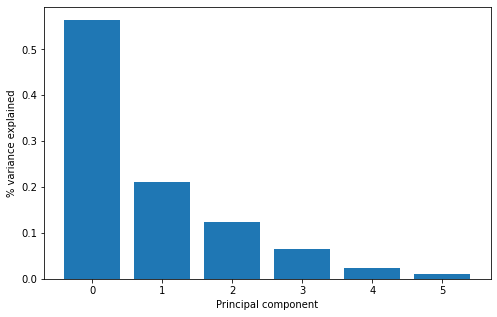

In [59]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.bar(x = range(len(pca.explained_variance_ratio_)), height= pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('% variance explained')
plt.savefig('pcs_var_explained_barplot.png',dpi=500)